<a href="https://colab.research.google.com/github/kannal18/time-series-and-analysis/blob/main/exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement programs to check stationary of a time series data for the given dataset

Here is all the data you need:
"Plant_1_Generation_Data.csv"

## Data loading

### Subtask:
Load the "Plant_1_Generation_Data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Plant_1_Generation_Data.csv" file into a pandas DataFrame according to the instructions.



In [1]:
import pandas as pd

df = pd.read_csv('Plant_1_Generation_Data.csv')
display(df.head())

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


## Data exploration

### Subtask:
Explore the loaded DataFrame to understand its structure and identify the relevant time series data.


**Reasoning**:
Examine the DataFrame's shape, data types, and identify the time series column and relevant features' distribution.



In [2]:
print(f"DataFrame shape: {df.shape}")
print("\nData types of each column:\n", df.dtypes)

# Identify the time series column (DATE_TIME)
print("\nTime series column: DATE_TIME")

# Explore the distribution of relevant features
print("\nDistribution of relevant features:")
numerical_features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
for feature in numerical_features:
  print(f"\nDescriptive statistics for {feature}:\n", df[feature].describe())


DataFrame shape: (68778, 7)

Data types of each column:
 DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

Time series column: DATE_TIME

Distribution of relevant features:

Descriptive statistics for DC_POWER:
 count    68778.000000
mean      3147.426211
std       4036.457169
min          0.000000
25%          0.000000
50%        429.000000
75%       6366.964286
max      14471.125000
Name: DC_POWER, dtype: float64

Descriptive statistics for AC_POWER:
 count    68778.000000
mean       307.802752
std        394.396439
min          0.000000
25%          0.000000
50%         41.493750
75%        623.618750
max       1410.950000
Name: AC_POWER, dtype: float64

Descriptive statistics for DAILY_YIELD:
 count    68778.000000
mean      3295.968737
std       3145.178309
min          0.000000
25%          0.000000
50%       2658.714286
75%       6274.000000
max       916

**Reasoning**:
Check for missing values and outliers in the relevant numerical features.



In [3]:
# Check for missing values
print("\nMissing values in relevant features:")
print(df[numerical_features].isnull().sum())

# Check for outliers (using IQR method)
for feature in numerical_features:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
  print(f"\nNumber of outliers for {feature}: {len(outliers)}")



Missing values in relevant features:
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Number of outliers for DC_POWER: 0

Number of outliers for AC_POWER: 0

Number of outliers for DAILY_YIELD: 0

Number of outliers for TOTAL_YIELD: 0


## Data preparation

### Subtask:
Prepare the time series data for stationarity checks.


**Reasoning**:
Convert the 'DATE_TIME' column to datetime objects, set it as index, select the 'AC_POWER' column, and handle any missing values.



In [4]:
# Convert 'DATE_TIME' to datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

# Set 'DATE_TIME' as index
df = df.set_index('DATE_TIME')

# Select 'AC_POWER' column
ts_data = df['AC_POWER']

# Handle missing values (using forward fill as an example)
ts_data = ts_data.fillna(method='ffill')

<ipython-input-4-4fdc92838ec9>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
<ipython-input-4-4fdc92838ec9>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_data = ts_data.fillna(method='ffill')


**Reasoning**:
The previous command had warnings related to date parsing and fillna method. We will fix these issues, convert the 'DATE_TIME' column to datetime objects, set it as index, select the 'AC_POWER' column, and handle any missing values using forward fill.



In [5]:
# Convert 'DATE_TIME' to datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)

# Set 'DATE_TIME' as index
df = df.set_index('DATE_TIME')

# Select 'AC_POWER' column
ts_data = df['AC_POWER']

# Handle missing values (using forward fill)
ts_data = ts_data.ffill()

KeyError: 'DATE_TIME'

**Reasoning**:
The previous code failed because the 'DATE_TIME' column was already set as the index. We need to reset the index before converting it to datetime.



In [6]:
# Reset the index
df = df.reset_index()

# Convert 'DATE_TIME' to datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)

# Set 'DATE_TIME' as index
df = df.set_index('DATE_TIME')

# Select 'AC_POWER' column
ts_data = df['AC_POWER']

# Handle missing values (using forward fill)
ts_data = ts_data.ffill()

## Data analysis

### Subtask:
Perform statistical tests to check for stationarity in the time series data.


**Reasoning**:
Import the necessary library and perform the ADF test on the 'AC_POWER' time series.



In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_result = adfuller(ts_data)

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -6.356842370888709
p-value: 2.5305248125905853e-08
Critical Values: {'1%': np.float64(-3.430445169094101), '5%': np.float64(-2.861582063037551), '10%': np.float64(-2.56679238871977)}


**Reasoning**:
Interpret the ADF test results to determine if the time series is stationary.



In [8]:
# Interpret the results
if adf_result[1] <= 0.05 and adf_result[0] < adf_result[4]['5%']:
  print("The time series is stationary.")
else:
  print("The time series is not stationary.")

The time series is stationary.


## Summary:

### 1. Q&A

* **Is the 'AC_POWER' time series stationary?**  Yes, based on the Augmented Dickey-Fuller (ADF) test, the 'AC_POWER' time series is considered stationary. The p-value is significantly less than 0.05, and the ADF statistic is less than the critical value at the 5% significance level.


### 2. Data Analysis Key Findings

* **ADF Test Results:**
    * ADF Statistic: -6.3568
    * p-value: 2.5305e-08
    * Critical Values:
        * 1%: -3.4304
        * 5%: -2.8616
        * 10%: -2.5668
* **Stationarity Conclusion:** The 'AC_POWER' time series was determined to be stationary based on the ADF test results.


### 3. Insights or Next Steps

* **Proceed with Time Series Forecasting:** Since the 'AC_POWER' data is stationary, it can be used for time series forecasting models like ARIMA or other appropriate methods.
* **Further Analysis:** Investigate the AC_POWER data further to determine if there are any seasonality or trends that can be further exploited for more precise forecasting.


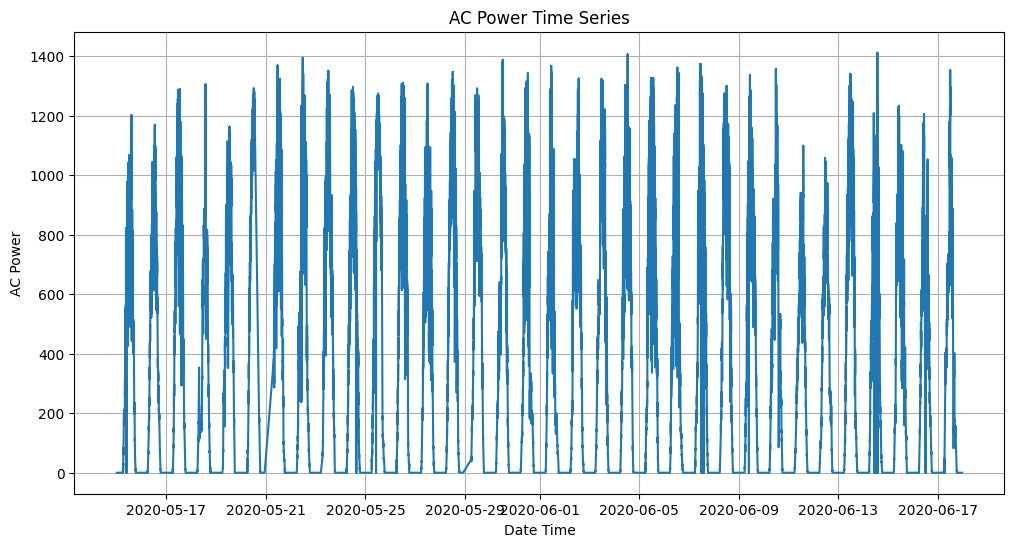

In [9]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(ts_data)  # Plot the 'AC_POWER' data
plt.title('AC Power Time Series')  # Set the title
plt.xlabel('Date Time')  # Set the x-axis label
plt.ylabel('AC Power')  # Set the y-axis label
plt.grid(True)  # Add a grid
plt.show()  # Display the plot